In [0]:
'''Titanic: Usar algoritmo pra saber se pessoa iria sobreviver ou não'''
'''histograma: Linhas em branco: que estão faltando dados'''
#Imputação de dados(lidar com dados que estão faltando):

'histograma: Linhas em branco: que estão faltando dados'

titanic_survival[titanic_survival["age"].isnull()]: retorna as linhas que são null(verdadeiro)

titanic_survival[titanic_survival["age"].isnull()].shape: nº de linhas e colunas

In [0]:
#20/03/2019
#PIVOT_TABLE
import pandas as pd

data = pd.read_csv("titanic_survival.csv")
data.head(2)
#idade media das pessoas na 1, 2 e 3 classe

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [0]:
import numpy as np

#index: valor que quer agrupar pela classe
#quer agrupar o valor das idades por classe
#quer calcular a média
#aggfunc: agregation function
data.pivot_table(index="pclass", values="age", aggfunc="mean")

#Só a da classe 2:
# data.pivot_table(index="pclass", values="age", aggfunc="mean").age.loc[2.0]

#idade média e preço médio
data2 = data.pivot_table(index="pclass", values=["age","fare"], aggfunc=[np.mean, np.max])
data2

mean             amax          
              age       fare   age      fare
pclass                                      
1.0     39.159918  87.508992  80.0  512.3292
2.0     29.506705  21.179196  70.0   73.5000
3.0     24.816367  13.302889  74.0   69.5500

In [0]:
#Pegar o valor máximo do "fare" da classe 3:
data2.amax.fare.loc[3.0]

69.55

In [0]:
#Calcular a idade media por classe das pessoas que sobreviveram e das que não
data3 = data.pivot_table(index=["pclass", "survived"], values="age", aggfunc=np.mean)
data3

age
pclass survived           
1.0    0.0       43.247573
       1.0       36.833794
2.0    0.0       33.167808
       1.0       24.858696
3.0    0.0       25.974549
       1.0       21.545166

In [0]:
#Idade média das pessoas que morreram na segunda classe:
#PEGA DO EXTERNO PARA O INTERNO
data3.age.loc[2.0].loc[0.0]

33.167808219178085

In [0]:
#Quantas pessoas da 1,2 e 3 classe sobreviveram e quantos morreram
data4 = data.pivot_table(index=["pclass","survived"], values="age", aggfunc="count") #nesse caso não importa quem botar no values
data4

age
pclass survived     
1.0    0.0       103
       1.0       181
2.0    0.0       146
       1.0       115
3.0    0.0       370
       1.0       131

In [0]:
data4.age.sum() #número de pessoas
data4.age/data4.age.sum() #calcula a porcentagem

pclass  survived
1.0     0.0         0.098470
        1.0         0.173040
2.0     0.0         0.139579
        1.0         0.109943
3.0     0.0         0.353728
        1.0         0.125239
Name: age, dtype: float64

In [0]:
# df.dropna() --> apague a linha se not a number
# df.dropna(axis=1) --> apaga a coluna se tiver um dado faltando nela

In [0]:
#pd.cut
#Separar idade por crian,a adolescente, ...
data["agecat"] = pd.cut(data.age, bins=[0,5,10,18,30,50,65,100], labels=["Infant","Child","Teenager",
                                "Young adult","Adult","Senior adult","Senior"])
data[["age","agecat"]]

,age,agecat
0,29.0000,Young adult
1,0.9167,Infant
2,2.0000,Infant
3,30.0000,Young adult
4,25.0000,Young adult
5,48.0000,Adult
6,63.0000,Senior adult
7,39.0000,Adult
8,53.0000,Senior adult
9,71.0000,Senior


## 1 Introduction


In this lesson, we'll clean and analyze data on passenger survival from the [Titanic](https://en.wikipedia.org/wiki/RMS_Titanic). Each row contains information for a specific Titanic passenger.

Here are the first few rows of the dataset:

|  | pclass | survived | name                                            | sex    | age     | sibsp | parch | ticket | fare     | cabin   | embarked | boat | body | home.dest                       |
|---|--------|----------|-------------------------------------------------|--------|---------|-------|-------|--------|----------|---------|----------|------|------|---------------------------------|
| 0 | 1      | 1        | Allen, Miss. Elisabeth Walton                   | female | 29.0000 | 0     | 0     | 24160  | 211.3375 | B5      | S        | 2    |      | St Louis, MO                    |
| 1 | 1      | 1        | Allison, Master. Hudson Trevor                  | male   | 0.9167  | 1     | 2     | 113781 | 151.5500 | C22 C26 | S        | 11   |      | Montreal, PQ / Chesterville, ON |
| 2 | 1      | 0        | Allison, Miss. Helen Loraine                    | female | 2       | 1     | 2     | 113781 | 151.5500 | C22 C26 | S        |      |      | Montreal, PQ / Chesterville, ON |
| 3 | 1      | 0        | Allison, Mr. Hudson Joshua Creighton            | male   | 30.0000 | 1     | 2     | 113781 | 151.5500 | C22 C26 | S        |      | 135  | Montreal, PQ / Chesterville, ON |
| 4 | 1      | 0        | Allison, Mrs. Hudson J C (Bessie Waldo Daniels) | female | 25      | 1     | 2     | 113781 | 151.5500 | C22 C26 | S        |      |      | Montreal, PQ / Chesterville,    |


Lets take a closer look at a few of the key columns:

- **pclass** -- The passenger's cabin class from **1** to **3** where **1** was the highest class
- **survived** -- **1** if the passenger survived, and **0** if they did not.
- **sex** -- The passenger's gender
- **age** -- The passenger's age
- **fare** -- The amount the passenger paid for their ticket
- **embarked** -- Either **C**, **Q**, or **S**, to indicate which port the passenger boarded the ship from.


Many of the columns, such as **sex** and **age**, have missing values.

Because missing values can cause errors in numerical functions, we'll need to deal with them before we can analyze the data. For instance, finding the mean of a column with a missing value will fail because it's impossible to average a missing value. Addressing missing values will let us perform calculations on the entire data set.



### 1.1 Importing the data



Let's import the data set into pandas.
```python
import pandas as pd
```

This gives the pandas library the alias **pd**, so that instead of typing pandas every time we want to use a function, we can instead type **pd**, for example **pd.read_csv()**.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


**Description**:

1. Read the file **titanic_survival.csv** into a dataframe called **titanic_survival**.

In [0]:
# put your code here
import pandas as pd
titanic_survival = pd.read_csv("titanic_survival.csv") #lê arquivo e forma tabela.


### 1.2 Finding the missing data



Missing data can take a few different forms:

- In Python, the None keyword and type indicates no value.
- The Pandas library uses **NaN**, which stands for **"not a number"**, to indicate a missing value.
- In general terms, both **NaN** and **None** can be called null values.

If we want to see which values are **NaN**, we can use the [pd.isnull()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) function which takes a pandas series and returns a series of **True** and **False** values, the same way that NumPy did when we compared arrays.


```python
sex = titanic_survival["sex"]
sex_is_null = pd.isnull(sex)
```

We can use this resultant series to select only the rows that have null values.

```python
sex_null_true = sex[sex_is_null]
```

We'll use this structure to look at the null values for the **"age"** column.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



**Description**:

1. Count how many values in the **"age"** column have null values:
    - Use **pandas.isnull()** on **age** variable to create a Series of **True** and **False** values. 
    - Use the resulting series to select only the elements in age that are null, and assign the result to **age_null_true**
    - Assign the length of **age_null_true** to **age_null_count**.
2. Print **age_null_count** to see how many null values are in the **"age"** column.

In [0]:
# put your code here
# age = titanic_survival["age"]
# age_is_null = pd.isnull(titanic_survival["age"])
# age_null_true = age[age_is_null]
'''vector that only contains values from the "age" column that are NaN:'''
age_null_true = titanic_survival["age"][pd.isnull(titanic_survival["age"])]
age_null_count = len(age_null_true)
print(age_null_count)

264


## 2 missingno 



Messy datasets? Missing values? [missingno](https://github.com/ResidentMario/missingno) provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset. 

In [0]:
!pip install missingno

### 2.1 Matrix

The **msno.matrix** nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

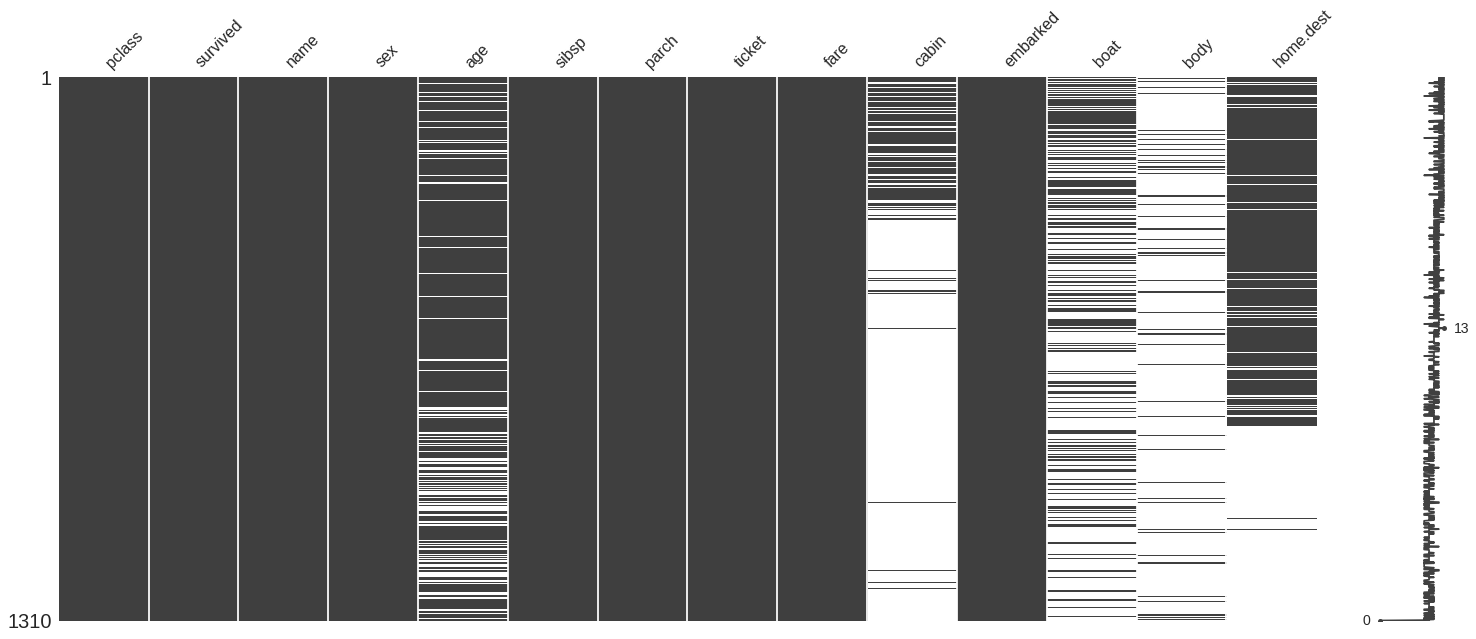

In [0]:
import missingno as msno
import matplotlib.pyplot as plt

# the sparkline at right summarizes the general shape of the data completeness 
# and points out the maximum and minimum rows. Note that last row is all NaN
msno.matrix(titanic_survival)

### 2.2 Heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization.

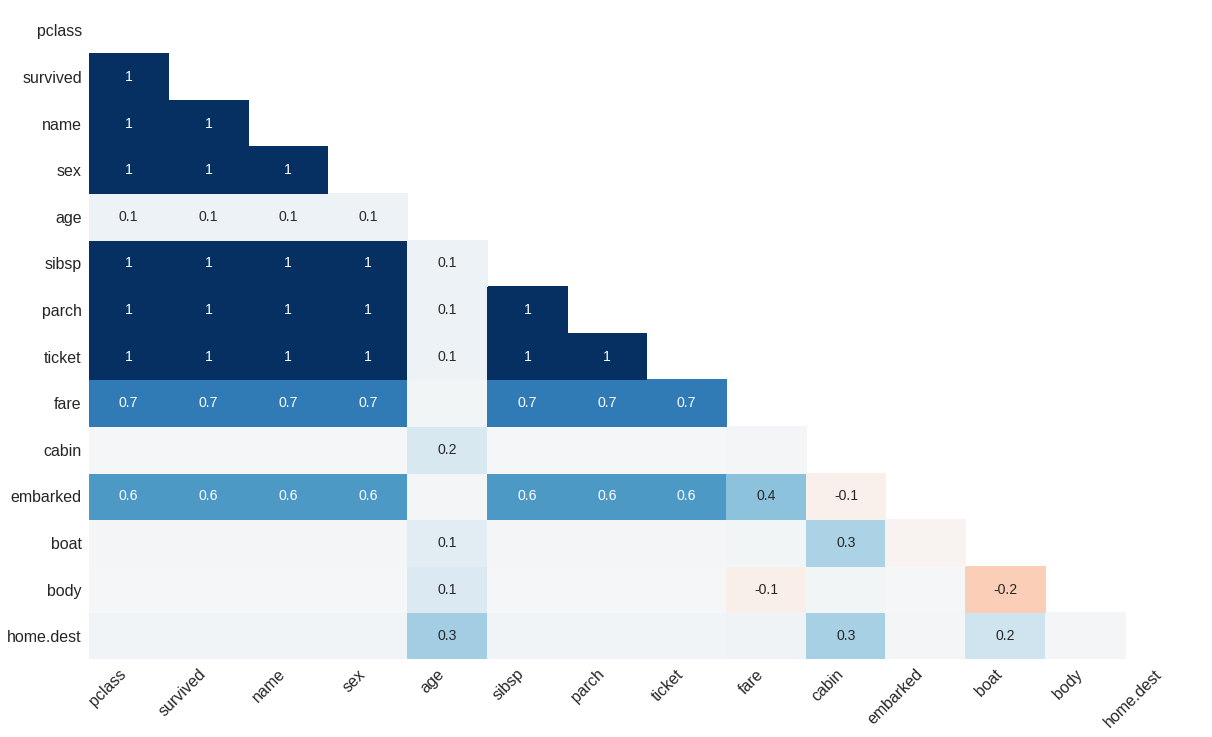

In [0]:
msno.heatmap(titanic_survival)

## 3 What is The Big Deal With Missing Data?




So, we know that quite a few values are missing from the **"age"** column, and other columns are missing data too. But why is this a problem?

Lets look at a typical approach to calculate the average for the **"age"** column:

```python
mean_age = sum(titanic_survival["age"]) / len(titanic_survival["age"])
```

The result of this is that **mean_age** would be **nan**. This is because any calculations we do with a null value also result in a null value. This makes sense when you think about it -- how can you add a null value to a known value?

Instead, we have to filter out the missing values before we calculate the mean.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


**Description**:

1. Use **age_is_null** to create a vector that only contains values from the **"age"** column that aren't **NaN**.

```python
age_is_null = pd.isnull(titanic_survival["age"])
```

2. Calculate the mean of the new vector, and assign the result to **correct_mean_age**.


In [0]:
# put your code here
''' vector that only contains values from the "age" column that aren't NaN:'''
# age_is_null = pd.isnull(titanic_survival["age"])
# vector_ages_not_null = titanic_survival["age"][~age_is_null]
# print(vector_ages_not_null)
age_is_null = titanic_survival[titanic_survival["age"].notnull()]
age_is_null["age"]
correct_mean_age = age_is_null.age.mean()
correct_mean_age

29.8811345124283

## 4 Easier Ways To Do Math



Luckily, missing data is so common that many pandas methods automatically filter for it. For example, if we use use the [Series.mean()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html) method to calculate the mean of a column, missing values will not be included in the calculation.

To calculate the mean age that we did earlier, we can replace all of our code with one line

```python
correct_mean_age = titanic_survival["age"].mean()
```

Using the built in method is much easier, but it's import to understand what is happening behind the scenes.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



**Description**:

1. Assign the mean of the **"fare"** column to **correct_mean_fare**.

In [0]:
# put your code here
correct_mean_fare = titanic_survival["fare"].mean()
print(correct_mean_fare)

33.29547928134572


## 5 Calculating Summary Statistics




Let's calculate more summary statistics for the data. The **pclass** column indicates the cabin class for each passenger, which was either first **class (1)**, **second class (2)**, or **third class (3)**. You'll use the list **passenger_classes**, which contains these values, in the following exercise.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


**Description**:

1. Use a for loop to iterate over **passenger_classes**. 

```python
passenger_classes = [1, 2, 3]
fares_by_class = {}
```

    Within the for loop:
   - Select just the rows in **titanic_survival** where the **pclass** value is equivalent to the current iterator value (class).
   - Select just the **fare** column for the current subset of rows.
   - Use the **Series.mean** method to calculate the mean of this subset.
   - Add the mean of the class to the **fares_by_class** dictionary with class as the key.
   
2. Once the loop completes, the dictionary **fares_by_class** should have **1, 2, and 3** as keys, with the average fares as the corresponding values.


In [0]:
# put your code here
passenger_classes = [1, 2, 3]
fares_by_class = {} #"fares":"tarifas"
for i in passenger_classes:
  fares_by_class[i] = titanic_survival[titanic_survival.pclass == i]["fare"].mean() 
fares_by_class

{1: 87.50899164086687, 2: 21.1791963898917, 3: 13.302888700564957}

In [0]:
#OU
{i:titanic_survival[titanic_survival.pclass == i]["fare"].mean()
        for i in [1,2,3]} #resultado disso sai em um dicionário

{1: 87.50899164086687, 2: 21.1791963898917, 3: 13.302888700564957}

## 6 Making Pivot Tables



[Pivot tables](https://en.wikipedia.org/wiki/Pivot_table) provide an easy way to subset by one column and then apply a calculation like a sum or a mean. The concept of Pivot tables was popularized with the introduction of the 'PivotTable' feature in Microsoft Excel in the mid 1990's.

Pivot tables first group and then apply a calculation. In the previous screen, we actually made a pivot table manually by grouping by the column **"pclass"** and then calculating the mean of the **"fare"** column for each class.

Luckily, we can use the [Dataframe.pivot_table()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) method instead, which simplifies the kind of work we did on the last screen. To produce the same data, we could use one line.

|  | pclass | survived | name                                            | sex    | age     | sibsp | parch | ticket | fare     | cabin   | embarked | boat | body | home.dest                       |
|---|--------|----------|-------------------------------------------------|--------|---------|-------|-------|--------|----------|---------|----------|------|------|---------------------------------|
| 0 | 1      | 1        | Allen, Miss. Elisabeth Walton                   | female | 29.0000 | 0     | 0     | 24160  | 211.3375 | B5      | S        | 2    |      | St Louis, MO                    |
| 1 | 1      | 1        | Allison, Master. Hudson Trevor                  | male   | 0.9167  | 1     | 2     | 113781 | 151.5500 | C22 C26 | S        | 11   |      | Montreal, PQ / Chesterville, ON |
| 2 | 1      | 0        | Allison, Miss. Helen Loraine                    | female | 2       | 1     | 2     | 113781 | 151.5500 | C22 C26 | S        |      |      | Montreal, PQ / Chesterville, ON |
| 3 | 1      | 0        | Allison, Mr. Hudson Joshua Creighton            | male   | 30.0000 | 1     | 2     | 113781 | 151.5500 | C22 C26 | S        |      | 135  | Montreal, PQ / Chesterville, ON |
| 4 | 1      | 0        | Allison, Mrs. Hudson J C (Bessie Waldo Daniels) | female | 25      | 1     | 2     | 113781 | 151.5500 | C22 C26 | S        |      |      | Montreal, PQ / Chesterville,    |



```python
passenger_class_fares = titanic_survival.pivot_table(index="pclass", values="fare", aggfunc=np.mean)
```



The first parameter of the method, index tells the method which column to group by. The second parameter values is the column that we want to apply the calculation to, and aggfunc specifies the calculation we want to perform. The default for the **aggfunc** parameter is actually the mean, so if we're calculating this we can omit this parameter.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


**Description**:

1. Use the **DataFrame.pivot_table()** method to calculate the **mean** age for each passenger class (**"pclass"**).
2. Assign the result to **passenger_age**.
3. Display the **passenger_age** pivot table using the **print()** function.

In [0]:
# put your code here
passenger_age = titanic_survival.pivot_table(index="name", values="pclass", aggfunc="mean")
print(passenger_age)

                                                 pclass
name                                                   
Abbing, Mr. Anthony                                 3.0
Abbott, Master. Eugene Joseph                       3.0
Abbott, Mr. Rossmore Edward                         3.0
Abbott, Mrs. Stanton (Rosa Hunt)                    3.0
Abelseth, Miss. Karen Marie                         3.0
Abelseth, Mr. Olaus Jorgensen                       3.0
Abelson, Mr. Samuel                                 2.0
Abelson, Mrs. Samuel (Hannah Wizosky)               2.0
Abrahamsson, Mr. Abraham August Johannes            3.0
Abrahim, Mrs. Joseph (Sophie Halaut Easu)           3.0
Adahl, Mr. Mauritz Nils Martin                      3.0
Adams, Mr. John                                     3.0
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)      3.0
Aks, Master. Philip Frank                           3.0
Aks, Mrs. Sam (Leah Rosen)                          3.0
Albimona, Mr. Nassef Cassem                     

## 7  More complex pivot tables



We can use the **DataFrame.pivot_table()** method to perform even more advanced tasks. If we pass a list of column names to the values parameter instead of a single value, we can perform calculations on multiple columns at once.

We can also specify a custom calculation to be made. For instance, if we pass **np.sum** to the **aggfunc** parameter it will total the values in each column.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">



**Description**:

1. Make a pivot table that calculates the total fares collected (**"fare"**) and total number of survivors (**"survived"**) for each embarkation port (**"embarked"**).
2. Assign the result to **port_stats**.
3. Display **port_stats** using the **print()** function.

In [0]:
# put your code here
port_stats = titanic_survival.pivot_table(index="embarked", values=["fare", "survived"], aggfunc="count")
print(port_stats)

          fare  survived
embarked                
C          270       270
Q          123       123
S          913       914


## 8 Droping missing values



We learned how to remove the missing values in a vector of data, but how about in a matrix?

We can use the [DataFrame.dropna()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) method on pandas **DataFrames** to do this. The method will drop any rows that contain missing values.

The **dropna()** method takes an axis parameter, which indicates whether you would like to drop rows or columns. Specifying **axis=0** or **axis='index'** will drop any rows that have null values, while specifying **axis=1** or **axis='columns'** will drop any columns that have null values. We will use **0** and **1** since they're more commonly used, but you can use either.

The code below will drop all rows in **titanic_survival** that have null values.

```python
drop_na_rows = titanic_survival.dropna(axis=0)
```

There is also a parameter that allows you to specify a list of columns or rows to look at when using **dropna()**. You will need to use this in the next exercise - take a look at the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) to work out the name of this parameter and how it works.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


**Description**:

1. Drop all columns in **titanic_survival** that have missing values and assign the result to **drop_na_columns**.
2. Drop all rows in **titanic_survival** where the columns **"age"** or **"sex"** have missing values and assign the result to **new_titanic_survival**.


In [0]:
# put your code here
drop_na_colums = titanic_survival.dropna(axis=1)
new_titanic_survival = titanic_survival[["age", "sex"]].dropna(axis=0)

## 9 Guided Challenge

In [0]:
titanic_survival["agecat"] = pd.cut(titanic_survival.age,
                        bins=[0,5,10,18,30,50,65,100],
                        labels=["Infant","Child","Teenager",
                                "Young adult","Adult","Senior adult","Senior"])

In [0]:
titanic_survival.agecat.head()

0    Young adult
1         Infant
2         Infant
3    Young adult
4    Young adult
Name: agecat, dtype: category
Categories (7, object): [Infant < Child < Teenager < Young adult < Adult < Senior adult < Senior]

In [0]:
titanic_pivot = titanic_survival.pivot_table(index=["agecat","survived"],
                             values="age",
                             aggfunc="count").rename(columns={"age": "count"})
titanic_pivot

count
agecat       survived       
Infant       0.0          19
             1.0          37
Child        0.0          17
             1.0          13
Teenager     0.0          62
             1.0          45
Young adult  0.0         263
             1.0         153
Adult        0.0         201
             1.0         141
Senior adult 0.0          49
             1.0          36
Senior       0.0           8
             1.0           2

In [0]:
titanic_survival.pivot_table(index=["agecat","survived"],
                 values="age",
                 aggfunc=lambda x: len(x)/len(titanic_survival)).rename(columns={"age":"survived_rate"})

survived_rate
agecat       survived               
Infant       0.0            0.014504
             1.0            0.028244
Child        0.0            0.012977
             1.0            0.009924
Teenager     0.0            0.047328
             1.0            0.034351
Young adult  0.0            0.200763
             1.0            0.116794
Adult        0.0            0.153435
             1.0            0.107634
Senior adult 0.0            0.037405
             1.0            0.027481
Senior       0.0            0.006107
             1.0            0.001527

In [0]:
titanic_pivot["survived_rate"] = titanic_pivot["count"]/titanic_pivot["count"].sum()
titanic_pivot

count  survived_rate
agecat       survived                      
Infant       0.0          19       0.018164
             1.0          37       0.035373
Child        0.0          17       0.016252
             1.0          13       0.012428
Teenager     0.0          62       0.059273
             1.0          45       0.043021
Young adult  0.0         263       0.251434
             1.0         153       0.146272
Adult        0.0         201       0.192161
             1.0         141       0.134799
Senior adult 0.0          49       0.046845
             1.0          36       0.034417
Senior       0.0           8       0.007648
             1.0           2       0.001912